## Basic Exponential Smoothing (Simple Exponential Smoothing)
Exponential smoothing is a time series forecasting method for univariate data that gives more weight to recent observations while exponentially decreasing the weights of older observations.
### Here's the mathematical formulation for basic exponential smoothing:
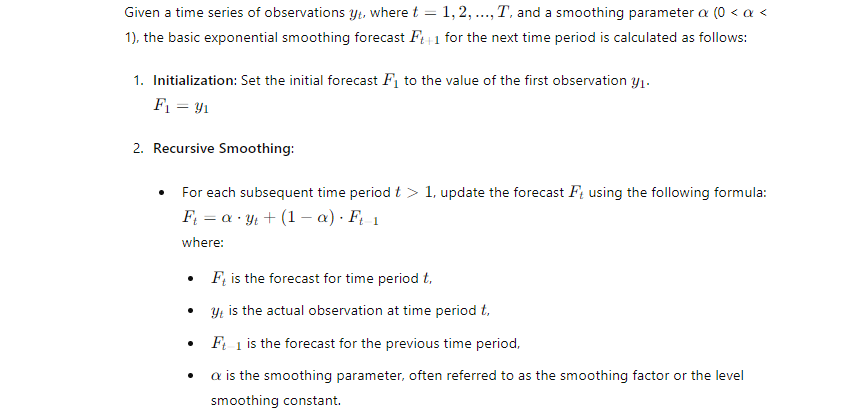


### This recursive smoothing formula exponentially discounts the older observations while assigning greater weight to the most recent observation. The forecast at each time period is a weighted average of the actual observation and the previous forecast.

## Holt-Winters Exponential Smoothing
Holt-Winters method extends basic exponential smoothing to handle trend and seasonality in the data. It comprises three components
- level(Lt), trend(bt) and seasonality(st)
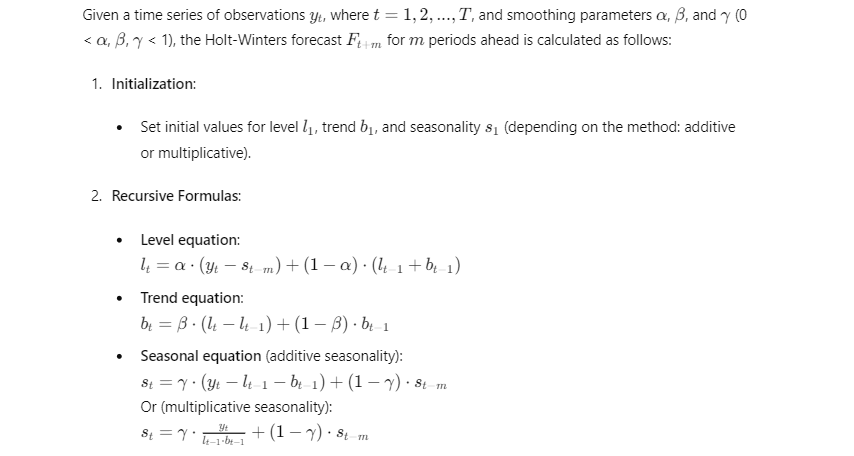

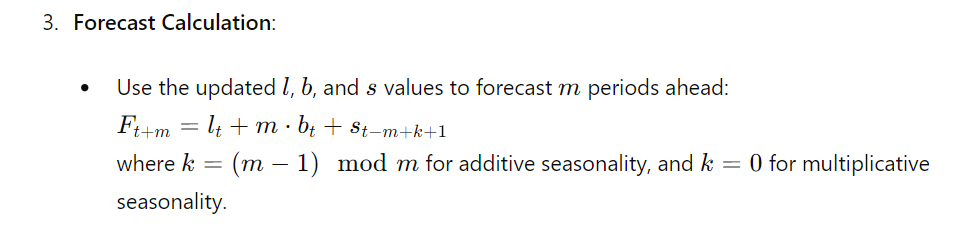
The Holt-Winters method incorporates a level component to capture the overall average, a trend component to capture the direction of the series, and a seasonal component to capture periodic fluctuations. The smoothing parameters (
𝛼, 𝛽, γ) control the responsiveness of the model to changes in these components.

## Mathematical Implementation

In [3]:
import numpy as np

# Given data
data = [324, 342, 376, 408, 420, 460, 502, 528, 560, 596, 624, 648, 690, 720]
n = len(data)
m = 12  # Assuming monthly seasonality

# Parameters
alpha = 0.1
beta = 0.2
gamma = 0.3

# Initialization
l = data[0]
b = data[1] - data[0]
s = [np.mean(data[i:i+m]) - l for i in range(m)]

# Holt-Winters method
forecast = []
for t in range(n):
    l_prev = l
    b_prev = b
    s_prev = s[t % m]
    
    # Level equation
    l = alpha * (data[t] - s_prev) + (1 - alpha) * (l_prev + b_prev)
    
    # Trend equation
    b = beta * (l - l_prev) + (1 - beta) * b_prev
    
    # Seasonal equation
    s[t % m] = gamma * (data[t] - l_prev - b_prev) + (1 - gamma) * s_prev
    
    # Forecast calculation
    forecast.append(l + b + s[t % m])

print("Forecast:", forecast)


Forecast: [444.2733333333333, 464.1638666666667, 488.47206933333337, 501.31576792242424, 506.0618722032484, 522.6899467937435, 541.2914149893141, 554.4911937798272, 571.6049803395019, 591.9651933983239, 610.4120812832972, 629.0160387541072, 498.47061303608746, 554.815157629148]


### Implementation using Stats Library

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


MAE: 9.114338061206379e-05
MSE: 1.1269848333485918e-08
RMSE: 0.00010615954188619089


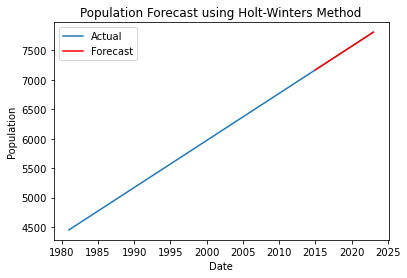

In [2]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the historical population data
data = pd.read_csv('poptrend.csv')
data['ds'] = pd.to_datetime(data['ds'])  # Convert 'ds' column to datetime format
data.set_index('ds', inplace=True)  # Set 'ds' column as index


# Extract 'y' column for analysis
y = data['y']

# Split the data into training and testing sets
train_data = y.iloc[:int(0.8*len(y))]
test_data = y.iloc[int(0.8*len(y)):]

# Apply Holt-Winters method
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast future population
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = abs(forecast - test_data.values).mean()
mse = ((forecast - test_data.values) ** 2).mean()
rmse = mse ** 0.5
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

# Visualize the forecast
import matplotlib.pyplot as plt
plt.plot(data.index, y, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Population Forecast using Holt-Winters Method')
plt.legend()
plt.show()


## Quick Practice:Implement the Holt-Winters method to forecast a list of passenger numbers using Python

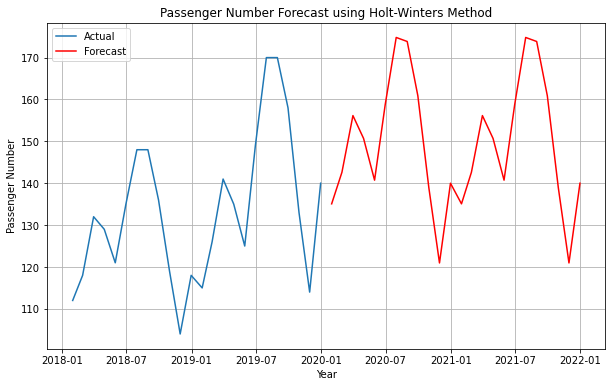

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Sample passenger data (replace this with your own data)
passenger_data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
                  115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140]

# Create a DataFrame with dates as index
dates = pd.date_range(start='2018-01-01', periods=len(passenger_data), freq='M')
passenger_df = pd.DataFrame(passenger_data, index=dates, columns=['Passengers'])

# Apply Holt-Winters method
model = ExponentialSmoothing(passenger_df, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast future passenger numbers
forecast = model_fit.forecast(steps=24)  # Forecasting for 2 years (24 months) ahead

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(passenger_df.index, passenger_df['Passengers'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Passenger Number')
plt.title('Passenger Number Forecast using Holt-Winters Method')
plt.legend()
plt.grid(True)
plt.show()
